# Get Names of Images Including Person

In [60]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET

In [61]:
from random import randint
import random

In [62]:
xml_src = glob.glob("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/Annotations/*.xml")

In [44]:
"""
num_imgs = 0
person_img_names = []

for xml_path in xml_src:
    
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person": 
                num_imgs += 1
                
                img_basename = os.path.basename(xml_path)
                img_onlyname = os.path.splitext(img_basename)
                person_img_names.append(img_onlyname[0])
                
                break

print(num_imgs)
"""

9583


In [65]:
num_imgs = 0
person_img_names = []

for xml_path in xml_src:
    
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('size'):
            obj_height = int(obj.find('height').text)
            obj_width = int(obj.find('width').text)
            if obj_height >= 360 and obj_width>=360: 
                num_imgs += 1
                
                img_basename = os.path.basename(xml_path)
                img_onlyname = os.path.splitext(img_basename)
                person_img_names.append(img_onlyname[0])
                
                break

print(num_imgs)

10890


In [66]:
# Names of Images Including Person: Array: person_img_names
print(person_img_names[0])

2008_002791


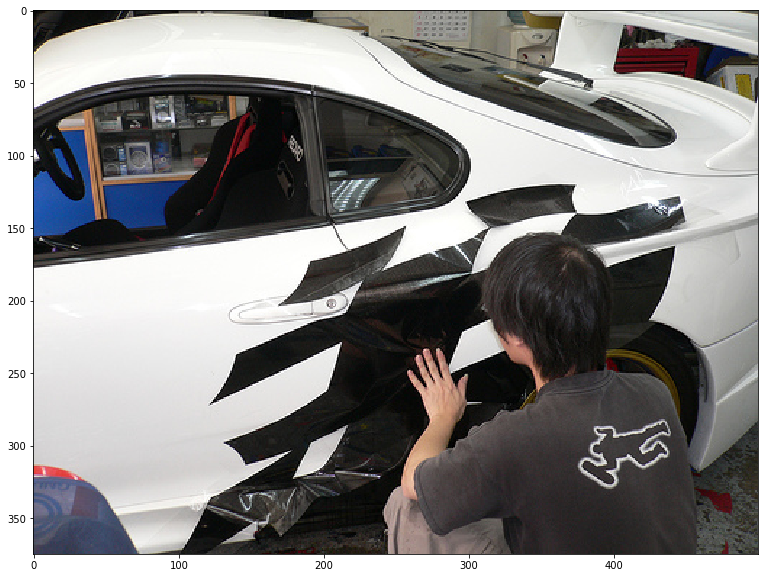

In [67]:
test_img = plt.imread("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/JPEGImages/" + person_img_names[randint(0, 1000)] + ".jpg")
plt.figure(figsize = (15, 10))
plt.imshow(test_img)

In [68]:
min_width = 3000
min_height = 3000
for img_name in person_img_names:
    
    img_path = "/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/JPEGImages/" + img_name + ".jpg"
    xml_path = "/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/Annotations/" + img_name + ".xml"

    image = cv2.imread(img_path)

    if(image.shape[0]<min_height):
        min_height = image.shape[0]
    if(image.shape[1]<min_width):
        min_width = image.shape[1]
        
print(min_height)
print(min_width)

360
360


# Generate Sub Images Including Person and Annotations

In [69]:
# Generate sub-image data
count = 0

sub_names = []
sub_infor = []

for img_name in person_img_names:
    count += 1
    
    img_path = "/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/JPEGImages/" + img_name + ".jpg"
    xml_path = "/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/Annotations/" + img_name + ".xml"

    image = cv2.imread(img_path)

    img_info = []
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            img_info.append([obj_name, left, top, right, bottom])

    print("Img", count, "- Num of Objs: ", len(img_info))

    # Innitialize
    new_w = 360//2
    new_h = 360//2

    # Crop Image
    cropped_img_0 = image[0:new_h, 0:new_w]
    cropped_img_1 = image[0:new_h, 360//2:360]
    cropped_img_2 = image[360//2:360, 0:new_w]
    cropped_img_3 = image[360//2:360, 360//2:360]


    # TOP-LEFT
    new_img_info_0 = []

    for obj in img_info:
        x1 = int(float(obj[1]))
        y1 = int(float(obj[2]))
        
        if x1 < new_w and y1 < new_h:
            x2 = int(float(obj[3]))
            y2 = int(float(obj[4]))
            if x2 > new_w: x2 = new_w
            if y2 > new_h: y2 = new_h

            new_img_info_0.append([obj[0], x1, y1, x2, y2])

    # TOP-RIGHT
    new_img_info_1 = []

    for obj in img_info:
        x1 = int(float(obj[1])) - new_w
        x2 = int(float(obj[3])) - new_w
        y1 = int(float(obj[2]))

        if x2 > 0 and y1 < new_h:
            if x1 < 0: x1 = 0
            y2 = int(float(obj[4]))
            if y2 > new_h: y2 = new_h

            new_img_info_1.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-LEFT
    new_img_info_2 = []

    for obj in img_info:
        y1 = int(float(obj[2])) - new_h
        y2 = int(float(obj[4])) - new_h
        x1 = int(float(obj[1]))

        if y2 > 0 and x1 < new_w:
            if y1 < 0: y1 = 0
            x2 = int(float(obj[3]))
            if x2 > new_w: x2 = new_w

            new_img_info_2.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-RIGHT
    new_img_info_3 = []

    for obj in img_info:
        x1 = int(float(obj[1])) - new_w
        y1 = int(float(obj[2])) - new_h
        x2 = int(float(obj[3])) - new_w
        y2 = int(float(obj[4])) - new_h

        if x2 > 0 and y2 > 0:
            if x1 < 0: x1 = 0
            if y1 < 0: y1 = 0

            new_img_info_3.append([obj[0], x1, y1, x2, y2])

    for infor_i in new_img_info_0:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/" + img_name + "_0.jpg", cropped_img_0)
            
            # Write Text
            text_file = open("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + img_name + "_0.txt", "w+")
            for infor in new_img_info_0:
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_1:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/" + img_name + "_1.jpg", cropped_img_1)
            
            # Write Text
            text_file = open("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + img_name + "_1.txt", "w+")
            for infor in new_img_info_1: 
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_2:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/" + img_name + "_2.jpg", cropped_img_2)
            
            # Write Text
            text_file = open("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + img_name + "_2.txt", "w+")
            for infor in new_img_info_2: 
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_3:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/" + img_name + "_3.jpg", cropped_img_3)
            
            # Write Text
            text_file = open("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + img_name + "_3.txt", "w+")
            for infor in new_img_info_3: 
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
    
    # if count == 10: break
    
print(count)

Img 1 - Num of Objs:  3
Img 2 - Num of Objs:  2
Img 3 - Num of Objs:  2
Img 4 - Num of Objs:  1
Img 5 - Num of Objs:  1
Img 6 - Num of Objs:  1
Img 7 - Num of Objs:  1
Img 8 - Num of Objs:  1
Img 9 - Num of Objs:  1
Img 10 - Num of Objs:  1
Img 11 - Num of Objs:  5
Img 12 - Num of Objs:  2
Img 13 - Num of Objs:  1
Img 14 - Num of Objs:  1
Img 15 - Num of Objs:  5
Img 16 - Num of Objs:  1
Img 17 - Num of Objs:  2
Img 18 - Num of Objs:  4
Img 19 - Num of Objs:  1
Img 20 - Num of Objs:  1
Img 21 - Num of Objs:  1
Img 22 - Num of Objs:  1
Img 23 - Num of Objs:  1
Img 24 - Num of Objs:  1
Img 25 - Num of Objs:  2
Img 26 - Num of Objs:  1
Img 27 - Num of Objs:  2
Img 28 - Num of Objs:  4
Img 29 - Num of Objs:  1
Img 30 - Num of Objs:  1
Img 31 - Num of Objs:  2
Img 32 - Num of Objs:  1
Img 33 - Num of Objs:  1
Img 34 - Num of Objs:  5
Img 35 - Num of Objs:  3
Img 36 - Num of Objs:  2
Img 37 - Num of Objs:  1
Img 38 - Num of Objs:  1
Img 39 - Num of Objs:  1
Img 40 - Num of Objs:  2
Img 41 - 

Img 338 - Num of Objs:  1
Img 339 - Num of Objs:  2
Img 340 - Num of Objs:  1
Img 341 - Num of Objs:  1
Img 342 - Num of Objs:  1
Img 343 - Num of Objs:  3
Img 344 - Num of Objs:  1
Img 345 - Num of Objs:  2
Img 346 - Num of Objs:  9
Img 347 - Num of Objs:  7
Img 348 - Num of Objs:  1
Img 349 - Num of Objs:  2
Img 350 - Num of Objs:  1
Img 351 - Num of Objs:  1
Img 352 - Num of Objs:  1
Img 353 - Num of Objs:  3
Img 354 - Num of Objs:  1
Img 355 - Num of Objs:  1
Img 356 - Num of Objs:  4
Img 357 - Num of Objs:  1
Img 358 - Num of Objs:  1
Img 359 - Num of Objs:  1
Img 360 - Num of Objs:  1
Img 361 - Num of Objs:  1
Img 362 - Num of Objs:  4
Img 363 - Num of Objs:  1
Img 364 - Num of Objs:  3
Img 365 - Num of Objs:  7
Img 366 - Num of Objs:  5
Img 367 - Num of Objs:  3
Img 368 - Num of Objs:  1
Img 369 - Num of Objs:  1
Img 370 - Num of Objs:  3
Img 371 - Num of Objs:  1
Img 372 - Num of Objs:  1
Img 373 - Num of Objs:  3
Img 374 - Num of Objs:  1
Img 375 - Num of Objs:  2
Img 376 - Nu

Img 685 - Num of Objs:  2
Img 686 - Num of Objs:  1
Img 687 - Num of Objs:  1
Img 688 - Num of Objs:  1
Img 689 - Num of Objs:  3
Img 690 - Num of Objs:  1
Img 691 - Num of Objs:  1
Img 692 - Num of Objs:  5
Img 693 - Num of Objs:  1
Img 694 - Num of Objs:  1
Img 695 - Num of Objs:  2
Img 696 - Num of Objs:  1
Img 697 - Num of Objs:  1
Img 698 - Num of Objs:  4
Img 699 - Num of Objs:  1
Img 700 - Num of Objs:  1
Img 701 - Num of Objs:  1
Img 702 - Num of Objs:  2
Img 703 - Num of Objs:  1
Img 704 - Num of Objs:  2
Img 705 - Num of Objs:  9
Img 706 - Num of Objs:  3
Img 707 - Num of Objs:  2
Img 708 - Num of Objs:  1
Img 709 - Num of Objs:  1
Img 710 - Num of Objs:  5
Img 711 - Num of Objs:  3
Img 712 - Num of Objs:  1
Img 713 - Num of Objs:  2
Img 714 - Num of Objs:  3
Img 715 - Num of Objs:  1
Img 716 - Num of Objs:  3
Img 717 - Num of Objs:  1
Img 718 - Num of Objs:  5
Img 719 - Num of Objs:  7
Img 720 - Num of Objs:  1
Img 721 - Num of Objs:  1
Img 722 - Num of Objs:  1
Img 723 - Nu

Img 1019 - Num of Objs:  6
Img 1020 - Num of Objs:  5
Img 1021 - Num of Objs:  4
Img 1022 - Num of Objs:  2
Img 1023 - Num of Objs:  1
Img 1024 - Num of Objs:  1
Img 1025 - Num of Objs:  1
Img 1026 - Num of Objs:  1
Img 1027 - Num of Objs:  2
Img 1028 - Num of Objs:  6
Img 1029 - Num of Objs:  1
Img 1030 - Num of Objs:  1
Img 1031 - Num of Objs:  1
Img 1032 - Num of Objs:  1
Img 1033 - Num of Objs:  2
Img 1034 - Num of Objs:  5
Img 1035 - Num of Objs:  2
Img 1036 - Num of Objs:  1
Img 1037 - Num of Objs:  1
Img 1038 - Num of Objs:  7
Img 1039 - Num of Objs:  2
Img 1040 - Num of Objs:  1
Img 1041 - Num of Objs:  4
Img 1042 - Num of Objs:  2
Img 1043 - Num of Objs:  4
Img 1044 - Num of Objs:  1
Img 1045 - Num of Objs:  11
Img 1046 - Num of Objs:  2
Img 1047 - Num of Objs:  1
Img 1048 - Num of Objs:  2
Img 1049 - Num of Objs:  2
Img 1050 - Num of Objs:  2
Img 1051 - Num of Objs:  1
Img 1052 - Num of Objs:  1
Img 1053 - Num of Objs:  1
Img 1054 - Num of Objs:  7
Img 1055 - Num of Objs:  4


Img 1362 - Num of Objs:  1
Img 1363 - Num of Objs:  2
Img 1364 - Num of Objs:  8
Img 1365 - Num of Objs:  2
Img 1366 - Num of Objs:  1
Img 1367 - Num of Objs:  1
Img 1368 - Num of Objs:  4
Img 1369 - Num of Objs:  2
Img 1370 - Num of Objs:  1
Img 1371 - Num of Objs:  4
Img 1372 - Num of Objs:  2
Img 1373 - Num of Objs:  1
Img 1374 - Num of Objs:  1
Img 1375 - Num of Objs:  1
Img 1376 - Num of Objs:  1
Img 1377 - Num of Objs:  7
Img 1378 - Num of Objs:  1
Img 1379 - Num of Objs:  5
Img 1380 - Num of Objs:  3
Img 1381 - Num of Objs:  1
Img 1382 - Num of Objs:  1
Img 1383 - Num of Objs:  6
Img 1384 - Num of Objs:  1
Img 1385 - Num of Objs:  1
Img 1386 - Num of Objs:  1
Img 1387 - Num of Objs:  2
Img 1388 - Num of Objs:  2
Img 1389 - Num of Objs:  1
Img 1390 - Num of Objs:  1
Img 1391 - Num of Objs:  3
Img 1392 - Num of Objs:  2
Img 1393 - Num of Objs:  1
Img 1394 - Num of Objs:  1
Img 1395 - Num of Objs:  1
Img 1396 - Num of Objs:  10
Img 1397 - Num of Objs:  2
Img 1398 - Num of Objs:  1


Img 1695 - Num of Objs:  1
Img 1696 - Num of Objs:  7
Img 1697 - Num of Objs:  1
Img 1698 - Num of Objs:  1
Img 1699 - Num of Objs:  2
Img 1700 - Num of Objs:  2
Img 1701 - Num of Objs:  1
Img 1702 - Num of Objs:  3
Img 1703 - Num of Objs:  4
Img 1704 - Num of Objs:  8
Img 1705 - Num of Objs:  2
Img 1706 - Num of Objs:  7
Img 1707 - Num of Objs:  2
Img 1708 - Num of Objs:  3
Img 1709 - Num of Objs:  1
Img 1710 - Num of Objs:  9
Img 1711 - Num of Objs:  1
Img 1712 - Num of Objs:  3
Img 1713 - Num of Objs:  1
Img 1714 - Num of Objs:  1
Img 1715 - Num of Objs:  1
Img 1716 - Num of Objs:  1
Img 1717 - Num of Objs:  1
Img 1718 - Num of Objs:  1
Img 1719 - Num of Objs:  1
Img 1720 - Num of Objs:  9
Img 1721 - Num of Objs:  2
Img 1722 - Num of Objs:  4
Img 1723 - Num of Objs:  1
Img 1724 - Num of Objs:  6
Img 1725 - Num of Objs:  1
Img 1726 - Num of Objs:  5
Img 1727 - Num of Objs:  1
Img 1728 - Num of Objs:  8
Img 1729 - Num of Objs:  8
Img 1730 - Num of Objs:  4
Img 1731 - Num of Objs:  5
I

Img 2043 - Num of Objs:  1
Img 2044 - Num of Objs:  1
Img 2045 - Num of Objs:  2
Img 2046 - Num of Objs:  1
Img 2047 - Num of Objs:  1
Img 2048 - Num of Objs:  3
Img 2049 - Num of Objs:  3
Img 2050 - Num of Objs:  1
Img 2051 - Num of Objs:  4
Img 2052 - Num of Objs:  2
Img 2053 - Num of Objs:  4
Img 2054 - Num of Objs:  4
Img 2055 - Num of Objs:  2
Img 2056 - Num of Objs:  2
Img 2057 - Num of Objs:  4
Img 2058 - Num of Objs:  2
Img 2059 - Num of Objs:  4
Img 2060 - Num of Objs:  1
Img 2061 - Num of Objs:  1
Img 2062 - Num of Objs:  2
Img 2063 - Num of Objs:  6
Img 2064 - Num of Objs:  3
Img 2065 - Num of Objs:  2
Img 2066 - Num of Objs:  3
Img 2067 - Num of Objs:  2
Img 2068 - Num of Objs:  1
Img 2069 - Num of Objs:  8
Img 2070 - Num of Objs:  2
Img 2071 - Num of Objs:  1
Img 2072 - Num of Objs:  2
Img 2073 - Num of Objs:  8
Img 2074 - Num of Objs:  4
Img 2075 - Num of Objs:  3
Img 2076 - Num of Objs:  5
Img 2077 - Num of Objs:  3
Img 2078 - Num of Objs:  1
Img 2079 - Num of Objs:  1
I

Img 2386 - Num of Objs:  2
Img 2387 - Num of Objs:  1
Img 2388 - Num of Objs:  2
Img 2389 - Num of Objs:  1
Img 2390 - Num of Objs:  1
Img 2391 - Num of Objs:  4
Img 2392 - Num of Objs:  2
Img 2393 - Num of Objs:  1
Img 2394 - Num of Objs:  8
Img 2395 - Num of Objs:  2
Img 2396 - Num of Objs:  3
Img 2397 - Num of Objs:  1
Img 2398 - Num of Objs:  1
Img 2399 - Num of Objs:  2
Img 2400 - Num of Objs:  2
Img 2401 - Num of Objs:  1
Img 2402 - Num of Objs:  1
Img 2403 - Num of Objs:  3
Img 2404 - Num of Objs:  1
Img 2405 - Num of Objs:  8
Img 2406 - Num of Objs:  4
Img 2407 - Num of Objs:  1
Img 2408 - Num of Objs:  2
Img 2409 - Num of Objs:  1
Img 2410 - Num of Objs:  3
Img 2411 - Num of Objs:  2
Img 2412 - Num of Objs:  8
Img 2413 - Num of Objs:  2
Img 2414 - Num of Objs:  3
Img 2415 - Num of Objs:  2
Img 2416 - Num of Objs:  1
Img 2417 - Num of Objs:  4
Img 2418 - Num of Objs:  1
Img 2419 - Num of Objs:  2
Img 2420 - Num of Objs:  1
Img 2421 - Num of Objs:  1
Img 2422 - Num of Objs:  1
I

Img 2712 - Num of Objs:  2
Img 2713 - Num of Objs:  5
Img 2714 - Num of Objs:  1
Img 2715 - Num of Objs:  3
Img 2716 - Num of Objs:  4
Img 2717 - Num of Objs:  1
Img 2718 - Num of Objs:  2
Img 2719 - Num of Objs:  1
Img 2720 - Num of Objs:  1
Img 2721 - Num of Objs:  4
Img 2722 - Num of Objs:  3
Img 2723 - Num of Objs:  2
Img 2724 - Num of Objs:  1
Img 2725 - Num of Objs:  1
Img 2726 - Num of Objs:  1
Img 2727 - Num of Objs:  3
Img 2728 - Num of Objs:  16
Img 2729 - Num of Objs:  1
Img 2730 - Num of Objs:  6
Img 2731 - Num of Objs:  2
Img 2732 - Num of Objs:  2
Img 2733 - Num of Objs:  4
Img 2734 - Num of Objs:  1
Img 2735 - Num of Objs:  2
Img 2736 - Num of Objs:  1
Img 2737 - Num of Objs:  1
Img 2738 - Num of Objs:  5
Img 2739 - Num of Objs:  1
Img 2740 - Num of Objs:  1
Img 2741 - Num of Objs:  1
Img 2742 - Num of Objs:  1
Img 2743 - Num of Objs:  1
Img 2744 - Num of Objs:  1
Img 2745 - Num of Objs:  1
Img 2746 - Num of Objs:  3
Img 2747 - Num of Objs:  3
Img 2748 - Num of Objs:  1


Img 3035 - Num of Objs:  1
Img 3036 - Num of Objs:  2
Img 3037 - Num of Objs:  1
Img 3038 - Num of Objs:  1
Img 3039 - Num of Objs:  3
Img 3040 - Num of Objs:  4
Img 3041 - Num of Objs:  1
Img 3042 - Num of Objs:  1
Img 3043 - Num of Objs:  2
Img 3044 - Num of Objs:  1
Img 3045 - Num of Objs:  2
Img 3046 - Num of Objs:  7
Img 3047 - Num of Objs:  1
Img 3048 - Num of Objs:  2
Img 3049 - Num of Objs:  1
Img 3050 - Num of Objs:  5
Img 3051 - Num of Objs:  3
Img 3052 - Num of Objs:  2
Img 3053 - Num of Objs:  3
Img 3054 - Num of Objs:  1
Img 3055 - Num of Objs:  1
Img 3056 - Num of Objs:  2
Img 3057 - Num of Objs:  3
Img 3058 - Num of Objs:  6
Img 3059 - Num of Objs:  2
Img 3060 - Num of Objs:  1
Img 3061 - Num of Objs:  1
Img 3062 - Num of Objs:  3
Img 3063 - Num of Objs:  3
Img 3064 - Num of Objs:  1
Img 3065 - Num of Objs:  1
Img 3066 - Num of Objs:  5
Img 3067 - Num of Objs:  3
Img 3068 - Num of Objs:  1
Img 3069 - Num of Objs:  1
Img 3070 - Num of Objs:  1
Img 3071 - Num of Objs:  2
I

Img 3384 - Num of Objs:  2
Img 3385 - Num of Objs:  2
Img 3386 - Num of Objs:  2
Img 3387 - Num of Objs:  4
Img 3388 - Num of Objs:  3
Img 3389 - Num of Objs:  1
Img 3390 - Num of Objs:  5
Img 3391 - Num of Objs:  1
Img 3392 - Num of Objs:  1
Img 3393 - Num of Objs:  2
Img 3394 - Num of Objs:  2
Img 3395 - Num of Objs:  1
Img 3396 - Num of Objs:  2
Img 3397 - Num of Objs:  1
Img 3398 - Num of Objs:  3
Img 3399 - Num of Objs:  1
Img 3400 - Num of Objs:  1
Img 3401 - Num of Objs:  1
Img 3402 - Num of Objs:  2
Img 3403 - Num of Objs:  1
Img 3404 - Num of Objs:  1
Img 3405 - Num of Objs:  1
Img 3406 - Num of Objs:  12
Img 3407 - Num of Objs:  1
Img 3408 - Num of Objs:  1
Img 3409 - Num of Objs:  1
Img 3410 - Num of Objs:  2
Img 3411 - Num of Objs:  1
Img 3412 - Num of Objs:  3
Img 3413 - Num of Objs:  1
Img 3414 - Num of Objs:  1
Img 3415 - Num of Objs:  1
Img 3416 - Num of Objs:  1
Img 3417 - Num of Objs:  1
Img 3418 - Num of Objs:  1
Img 3419 - Num of Objs:  4
Img 3420 - Num of Objs:  7


Img 3723 - Num of Objs:  1
Img 3724 - Num of Objs:  1
Img 3725 - Num of Objs:  1
Img 3726 - Num of Objs:  1
Img 3727 - Num of Objs:  1
Img 3728 - Num of Objs:  2
Img 3729 - Num of Objs:  1
Img 3730 - Num of Objs:  1
Img 3731 - Num of Objs:  1
Img 3732 - Num of Objs:  2
Img 3733 - Num of Objs:  1
Img 3734 - Num of Objs:  15
Img 3735 - Num of Objs:  1
Img 3736 - Num of Objs:  1
Img 3737 - Num of Objs:  1
Img 3738 - Num of Objs:  1
Img 3739 - Num of Objs:  1
Img 3740 - Num of Objs:  10
Img 3741 - Num of Objs:  1
Img 3742 - Num of Objs:  5
Img 3743 - Num of Objs:  5
Img 3744 - Num of Objs:  2
Img 3745 - Num of Objs:  1
Img 3746 - Num of Objs:  2
Img 3747 - Num of Objs:  1
Img 3748 - Num of Objs:  4
Img 3749 - Num of Objs:  1
Img 3750 - Num of Objs:  3
Img 3751 - Num of Objs:  3
Img 3752 - Num of Objs:  4
Img 3753 - Num of Objs:  1
Img 3754 - Num of Objs:  1
Img 3755 - Num of Objs:  5
Img 3756 - Num of Objs:  1
Img 3757 - Num of Objs:  2
Img 3758 - Num of Objs:  2
Img 3759 - Num of Objs:  1

Img 4062 - Num of Objs:  3
Img 4063 - Num of Objs:  5
Img 4064 - Num of Objs:  8
Img 4065 - Num of Objs:  3
Img 4066 - Num of Objs:  1
Img 4067 - Num of Objs:  2
Img 4068 - Num of Objs:  1
Img 4069 - Num of Objs:  4
Img 4070 - Num of Objs:  1
Img 4071 - Num of Objs:  3
Img 4072 - Num of Objs:  2
Img 4073 - Num of Objs:  1
Img 4074 - Num of Objs:  2
Img 4075 - Num of Objs:  1
Img 4076 - Num of Objs:  14
Img 4077 - Num of Objs:  1
Img 4078 - Num of Objs:  1
Img 4079 - Num of Objs:  3
Img 4080 - Num of Objs:  3
Img 4081 - Num of Objs:  1
Img 4082 - Num of Objs:  1
Img 4083 - Num of Objs:  1
Img 4084 - Num of Objs:  7
Img 4085 - Num of Objs:  1
Img 4086 - Num of Objs:  2
Img 4087 - Num of Objs:  6
Img 4088 - Num of Objs:  6
Img 4089 - Num of Objs:  2
Img 4090 - Num of Objs:  1
Img 4091 - Num of Objs:  1
Img 4092 - Num of Objs:  4
Img 4093 - Num of Objs:  1
Img 4094 - Num of Objs:  1
Img 4095 - Num of Objs:  1
Img 4096 - Num of Objs:  1
Img 4097 - Num of Objs:  3
Img 4098 - Num of Objs:  5


Img 4404 - Num of Objs:  2
Img 4405 - Num of Objs:  5
Img 4406 - Num of Objs:  2
Img 4407 - Num of Objs:  1
Img 4408 - Num of Objs:  1
Img 4409 - Num of Objs:  4
Img 4410 - Num of Objs:  2
Img 4411 - Num of Objs:  4
Img 4412 - Num of Objs:  2
Img 4413 - Num of Objs:  1
Img 4414 - Num of Objs:  2
Img 4415 - Num of Objs:  1
Img 4416 - Num of Objs:  3
Img 4417 - Num of Objs:  1
Img 4418 - Num of Objs:  2
Img 4419 - Num of Objs:  1
Img 4420 - Num of Objs:  3
Img 4421 - Num of Objs:  3
Img 4422 - Num of Objs:  1
Img 4423 - Num of Objs:  1
Img 4424 - Num of Objs:  1
Img 4425 - Num of Objs:  1
Img 4426 - Num of Objs:  2
Img 4427 - Num of Objs:  1
Img 4428 - Num of Objs:  3
Img 4429 - Num of Objs:  1
Img 4430 - Num of Objs:  2
Img 4431 - Num of Objs:  2
Img 4432 - Num of Objs:  7
Img 4433 - Num of Objs:  1
Img 4434 - Num of Objs:  1
Img 4435 - Num of Objs:  1
Img 4436 - Num of Objs:  1
Img 4437 - Num of Objs:  1
Img 4438 - Num of Objs:  1
Img 4439 - Num of Objs:  2
Img 4440 - Num of Objs:  3
I

Img 4748 - Num of Objs:  1
Img 4749 - Num of Objs:  3
Img 4750 - Num of Objs:  3
Img 4751 - Num of Objs:  1
Img 4752 - Num of Objs:  1
Img 4753 - Num of Objs:  4
Img 4754 - Num of Objs:  1
Img 4755 - Num of Objs:  1
Img 4756 - Num of Objs:  3
Img 4757 - Num of Objs:  12
Img 4758 - Num of Objs:  1
Img 4759 - Num of Objs:  1
Img 4760 - Num of Objs:  5
Img 4761 - Num of Objs:  1
Img 4762 - Num of Objs:  8
Img 4763 - Num of Objs:  1
Img 4764 - Num of Objs:  1
Img 4765 - Num of Objs:  1
Img 4766 - Num of Objs:  1
Img 4767 - Num of Objs:  1
Img 4768 - Num of Objs:  1
Img 4769 - Num of Objs:  1
Img 4770 - Num of Objs:  5
Img 4771 - Num of Objs:  1
Img 4772 - Num of Objs:  1
Img 4773 - Num of Objs:  2
Img 4774 - Num of Objs:  1
Img 4775 - Num of Objs:  2
Img 4776 - Num of Objs:  14
Img 4777 - Num of Objs:  1
Img 4778 - Num of Objs:  1
Img 4779 - Num of Objs:  1
Img 4780 - Num of Objs:  2
Img 4781 - Num of Objs:  1
Img 4782 - Num of Objs:  1
Img 4783 - Num of Objs:  2
Img 4784 - Num of Objs:  3

Img 5081 - Num of Objs:  1
Img 5082 - Num of Objs:  1
Img 5083 - Num of Objs:  2
Img 5084 - Num of Objs:  5
Img 5085 - Num of Objs:  2
Img 5086 - Num of Objs:  2
Img 5087 - Num of Objs:  4
Img 5088 - Num of Objs:  2
Img 5089 - Num of Objs:  1
Img 5090 - Num of Objs:  2
Img 5091 - Num of Objs:  2
Img 5092 - Num of Objs:  1
Img 5093 - Num of Objs:  1
Img 5094 - Num of Objs:  1
Img 5095 - Num of Objs:  2
Img 5096 - Num of Objs:  6
Img 5097 - Num of Objs:  1
Img 5098 - Num of Objs:  1
Img 5099 - Num of Objs:  1
Img 5100 - Num of Objs:  1
Img 5101 - Num of Objs:  1
Img 5102 - Num of Objs:  1
Img 5103 - Num of Objs:  2
Img 5104 - Num of Objs:  4
Img 5105 - Num of Objs:  6
Img 5106 - Num of Objs:  1
Img 5107 - Num of Objs:  6
Img 5108 - Num of Objs:  2
Img 5109 - Num of Objs:  1
Img 5110 - Num of Objs:  1
Img 5111 - Num of Objs:  1
Img 5112 - Num of Objs:  1
Img 5113 - Num of Objs:  7
Img 5114 - Num of Objs:  4
Img 5115 - Num of Objs:  1
Img 5116 - Num of Objs:  2
Img 5117 - Num of Objs:  1
I

Img 5421 - Num of Objs:  2
Img 5422 - Num of Objs:  1
Img 5423 - Num of Objs:  1
Img 5424 - Num of Objs:  1
Img 5425 - Num of Objs:  1
Img 5426 - Num of Objs:  1
Img 5427 - Num of Objs:  1
Img 5428 - Num of Objs:  1
Img 5429 - Num of Objs:  1
Img 5430 - Num of Objs:  1
Img 5431 - Num of Objs:  1
Img 5432 - Num of Objs:  2
Img 5433 - Num of Objs:  1
Img 5434 - Num of Objs:  3
Img 5435 - Num of Objs:  1
Img 5436 - Num of Objs:  1
Img 5437 - Num of Objs:  1
Img 5438 - Num of Objs:  3
Img 5439 - Num of Objs:  1
Img 5440 - Num of Objs:  2
Img 5441 - Num of Objs:  2
Img 5442 - Num of Objs:  1
Img 5443 - Num of Objs:  1
Img 5444 - Num of Objs:  1
Img 5445 - Num of Objs:  1
Img 5446 - Num of Objs:  1
Img 5447 - Num of Objs:  1
Img 5448 - Num of Objs:  2
Img 5449 - Num of Objs:  1
Img 5450 - Num of Objs:  1
Img 5451 - Num of Objs:  1
Img 5452 - Num of Objs:  1
Img 5453 - Num of Objs:  1
Img 5454 - Num of Objs:  3
Img 5455 - Num of Objs:  1
Img 5456 - Num of Objs:  1
Img 5457 - Num of Objs:  1
I

Img 5754 - Num of Objs:  2
Img 5755 - Num of Objs:  3
Img 5756 - Num of Objs:  1
Img 5757 - Num of Objs:  4
Img 5758 - Num of Objs:  2
Img 5759 - Num of Objs:  1
Img 5760 - Num of Objs:  1
Img 5761 - Num of Objs:  7
Img 5762 - Num of Objs:  1
Img 5763 - Num of Objs:  4
Img 5764 - Num of Objs:  2
Img 5765 - Num of Objs:  1
Img 5766 - Num of Objs:  3
Img 5767 - Num of Objs:  1
Img 5768 - Num of Objs:  1
Img 5769 - Num of Objs:  1
Img 5770 - Num of Objs:  1
Img 5771 - Num of Objs:  4
Img 5772 - Num of Objs:  1
Img 5773 - Num of Objs:  1
Img 5774 - Num of Objs:  2
Img 5775 - Num of Objs:  1
Img 5776 - Num of Objs:  1
Img 5777 - Num of Objs:  1
Img 5778 - Num of Objs:  1
Img 5779 - Num of Objs:  1
Img 5780 - Num of Objs:  1
Img 5781 - Num of Objs:  1
Img 5782 - Num of Objs:  2
Img 5783 - Num of Objs:  1
Img 5784 - Num of Objs:  3
Img 5785 - Num of Objs:  1
Img 5786 - Num of Objs:  5
Img 5787 - Num of Objs:  1
Img 5788 - Num of Objs:  3
Img 5789 - Num of Objs:  5
Img 5790 - Num of Objs:  3
I

Img 6077 - Num of Objs:  2
Img 6078 - Num of Objs:  1
Img 6079 - Num of Objs:  1
Img 6080 - Num of Objs:  3
Img 6081 - Num of Objs:  6
Img 6082 - Num of Objs:  1
Img 6083 - Num of Objs:  6
Img 6084 - Num of Objs:  2
Img 6085 - Num of Objs:  4
Img 6086 - Num of Objs:  1
Img 6087 - Num of Objs:  1
Img 6088 - Num of Objs:  1
Img 6089 - Num of Objs:  1
Img 6090 - Num of Objs:  1
Img 6091 - Num of Objs:  4
Img 6092 - Num of Objs:  8
Img 6093 - Num of Objs:  1
Img 6094 - Num of Objs:  1
Img 6095 - Num of Objs:  1
Img 6096 - Num of Objs:  1
Img 6097 - Num of Objs:  1
Img 6098 - Num of Objs:  3
Img 6099 - Num of Objs:  1
Img 6100 - Num of Objs:  2
Img 6101 - Num of Objs:  1
Img 6102 - Num of Objs:  1
Img 6103 - Num of Objs:  3
Img 6104 - Num of Objs:  2
Img 6105 - Num of Objs:  1
Img 6106 - Num of Objs:  2
Img 6107 - Num of Objs:  1
Img 6108 - Num of Objs:  9
Img 6109 - Num of Objs:  2
Img 6110 - Num of Objs:  2
Img 6111 - Num of Objs:  1
Img 6112 - Num of Objs:  2
Img 6113 - Num of Objs:  1
I

Img 6415 - Num of Objs:  1
Img 6416 - Num of Objs:  1
Img 6417 - Num of Objs:  1
Img 6418 - Num of Objs:  1
Img 6419 - Num of Objs:  6
Img 6420 - Num of Objs:  1
Img 6421 - Num of Objs:  2
Img 6422 - Num of Objs:  2
Img 6423 - Num of Objs:  1
Img 6424 - Num of Objs:  1
Img 6425 - Num of Objs:  1
Img 6426 - Num of Objs:  1
Img 6427 - Num of Objs:  4
Img 6428 - Num of Objs:  5
Img 6429 - Num of Objs:  3
Img 6430 - Num of Objs:  3
Img 6431 - Num of Objs:  1
Img 6432 - Num of Objs:  1
Img 6433 - Num of Objs:  2
Img 6434 - Num of Objs:  3
Img 6435 - Num of Objs:  1
Img 6436 - Num of Objs:  1
Img 6437 - Num of Objs:  1
Img 6438 - Num of Objs:  1
Img 6439 - Num of Objs:  4
Img 6440 - Num of Objs:  1
Img 6441 - Num of Objs:  1
Img 6442 - Num of Objs:  1
Img 6443 - Num of Objs:  4
Img 6444 - Num of Objs:  4
Img 6445 - Num of Objs:  4
Img 6446 - Num of Objs:  4
Img 6447 - Num of Objs:  4
Img 6448 - Num of Objs:  2
Img 6449 - Num of Objs:  1
Img 6450 - Num of Objs:  1
Img 6451 - Num of Objs:  1
I

Img 6763 - Num of Objs:  1
Img 6764 - Num of Objs:  1
Img 6765 - Num of Objs:  2
Img 6766 - Num of Objs:  2
Img 6767 - Num of Objs:  1
Img 6768 - Num of Objs:  5
Img 6769 - Num of Objs:  4
Img 6770 - Num of Objs:  3
Img 6771 - Num of Objs:  1
Img 6772 - Num of Objs:  1
Img 6773 - Num of Objs:  1
Img 6774 - Num of Objs:  2
Img 6775 - Num of Objs:  8
Img 6776 - Num of Objs:  1
Img 6777 - Num of Objs:  1
Img 6778 - Num of Objs:  1
Img 6779 - Num of Objs:  1
Img 6780 - Num of Objs:  1
Img 6781 - Num of Objs:  3
Img 6782 - Num of Objs:  6
Img 6783 - Num of Objs:  1
Img 6784 - Num of Objs:  1
Img 6785 - Num of Objs:  1
Img 6786 - Num of Objs:  10
Img 6787 - Num of Objs:  1
Img 6788 - Num of Objs:  4
Img 6789 - Num of Objs:  1
Img 6790 - Num of Objs:  1
Img 6791 - Num of Objs:  4
Img 6792 - Num of Objs:  1
Img 6793 - Num of Objs:  2
Img 6794 - Num of Objs:  1
Img 6795 - Num of Objs:  1
Img 6796 - Num of Objs:  14
Img 6797 - Num of Objs:  1
Img 6798 - Num of Objs:  2
Img 6799 - Num of Objs:  1

Img 7091 - Num of Objs:  1
Img 7092 - Num of Objs:  2
Img 7093 - Num of Objs:  1
Img 7094 - Num of Objs:  2
Img 7095 - Num of Objs:  1
Img 7096 - Num of Objs:  5
Img 7097 - Num of Objs:  1
Img 7098 - Num of Objs:  6
Img 7099 - Num of Objs:  6
Img 7100 - Num of Objs:  1
Img 7101 - Num of Objs:  8
Img 7102 - Num of Objs:  2
Img 7103 - Num of Objs:  1
Img 7104 - Num of Objs:  3
Img 7105 - Num of Objs:  1
Img 7106 - Num of Objs:  2
Img 7107 - Num of Objs:  3
Img 7108 - Num of Objs:  10
Img 7109 - Num of Objs:  1
Img 7110 - Num of Objs:  1
Img 7111 - Num of Objs:  1
Img 7112 - Num of Objs:  9
Img 7113 - Num of Objs:  2
Img 7114 - Num of Objs:  1
Img 7115 - Num of Objs:  7
Img 7116 - Num of Objs:  1
Img 7117 - Num of Objs:  1
Img 7118 - Num of Objs:  3
Img 7119 - Num of Objs:  2
Img 7120 - Num of Objs:  2
Img 7121 - Num of Objs:  2
Img 7122 - Num of Objs:  6
Img 7123 - Num of Objs:  1
Img 7124 - Num of Objs:  3
Img 7125 - Num of Objs:  2
Img 7126 - Num of Objs:  1
Img 7127 - Num of Objs:  1


Img 7409 - Num of Objs:  1
Img 7410 - Num of Objs:  2
Img 7411 - Num of Objs:  1
Img 7412 - Num of Objs:  1
Img 7413 - Num of Objs:  1
Img 7414 - Num of Objs:  1
Img 7415 - Num of Objs:  2
Img 7416 - Num of Objs:  1
Img 7417 - Num of Objs:  2
Img 7418 - Num of Objs:  5
Img 7419 - Num of Objs:  2
Img 7420 - Num of Objs:  1
Img 7421 - Num of Objs:  2
Img 7422 - Num of Objs:  2
Img 7423 - Num of Objs:  2
Img 7424 - Num of Objs:  1
Img 7425 - Num of Objs:  1
Img 7426 - Num of Objs:  1
Img 7427 - Num of Objs:  1
Img 7428 - Num of Objs:  2
Img 7429 - Num of Objs:  4
Img 7430 - Num of Objs:  1
Img 7431 - Num of Objs:  1
Img 7432 - Num of Objs:  2
Img 7433 - Num of Objs:  1
Img 7434 - Num of Objs:  3
Img 7435 - Num of Objs:  2
Img 7436 - Num of Objs:  4
Img 7437 - Num of Objs:  3
Img 7438 - Num of Objs:  3
Img 7439 - Num of Objs:  1
Img 7440 - Num of Objs:  2
Img 7441 - Num of Objs:  11
Img 7442 - Num of Objs:  1
Img 7443 - Num of Objs:  19
Img 7444 - Num of Objs:  1
Img 7445 - Num of Objs:  3

Img 7736 - Num of Objs:  3
Img 7737 - Num of Objs:  7
Img 7738 - Num of Objs:  1
Img 7739 - Num of Objs:  3
Img 7740 - Num of Objs:  1
Img 7741 - Num of Objs:  1
Img 7742 - Num of Objs:  1
Img 7743 - Num of Objs:  1
Img 7744 - Num of Objs:  1
Img 7745 - Num of Objs:  1
Img 7746 - Num of Objs:  4
Img 7747 - Num of Objs:  1
Img 7748 - Num of Objs:  2
Img 7749 - Num of Objs:  2
Img 7750 - Num of Objs:  1
Img 7751 - Num of Objs:  1
Img 7752 - Num of Objs:  3
Img 7753 - Num of Objs:  3
Img 7754 - Num of Objs:  1
Img 7755 - Num of Objs:  1
Img 7756 - Num of Objs:  1
Img 7757 - Num of Objs:  2
Img 7758 - Num of Objs:  1
Img 7759 - Num of Objs:  1
Img 7760 - Num of Objs:  3
Img 7761 - Num of Objs:  3
Img 7762 - Num of Objs:  2
Img 7763 - Num of Objs:  6
Img 7764 - Num of Objs:  1
Img 7765 - Num of Objs:  2
Img 7766 - Num of Objs:  8
Img 7767 - Num of Objs:  1
Img 7768 - Num of Objs:  1
Img 7769 - Num of Objs:  2
Img 7770 - Num of Objs:  1
Img 7771 - Num of Objs:  9
Img 7772 - Num of Objs:  2
I

Img 8066 - Num of Objs:  1
Img 8067 - Num of Objs:  8
Img 8068 - Num of Objs:  1
Img 8069 - Num of Objs:  3
Img 8070 - Num of Objs:  4
Img 8071 - Num of Objs:  1
Img 8072 - Num of Objs:  1
Img 8073 - Num of Objs:  1
Img 8074 - Num of Objs:  1
Img 8075 - Num of Objs:  1
Img 8076 - Num of Objs:  1
Img 8077 - Num of Objs:  1
Img 8078 - Num of Objs:  1
Img 8079 - Num of Objs:  3
Img 8080 - Num of Objs:  1
Img 8081 - Num of Objs:  3
Img 8082 - Num of Objs:  1
Img 8083 - Num of Objs:  6
Img 8084 - Num of Objs:  1
Img 8085 - Num of Objs:  1
Img 8086 - Num of Objs:  4
Img 8087 - Num of Objs:  2
Img 8088 - Num of Objs:  3
Img 8089 - Num of Objs:  1
Img 8090 - Num of Objs:  1
Img 8091 - Num of Objs:  1
Img 8092 - Num of Objs:  3
Img 8093 - Num of Objs:  1
Img 8094 - Num of Objs:  2
Img 8095 - Num of Objs:  1
Img 8096 - Num of Objs:  1
Img 8097 - Num of Objs:  3
Img 8098 - Num of Objs:  1
Img 8099 - Num of Objs:  2
Img 8100 - Num of Objs:  1
Img 8101 - Num of Objs:  6
Img 8102 - Num of Objs:  3
I

Img 8377 - Num of Objs:  1
Img 8378 - Num of Objs:  1
Img 8379 - Num of Objs:  3
Img 8380 - Num of Objs:  1
Img 8381 - Num of Objs:  2
Img 8382 - Num of Objs:  2
Img 8383 - Num of Objs:  1
Img 8384 - Num of Objs:  1
Img 8385 - Num of Objs:  3
Img 8386 - Num of Objs:  1
Img 8387 - Num of Objs:  1
Img 8388 - Num of Objs:  1
Img 8389 - Num of Objs:  8
Img 8390 - Num of Objs:  1
Img 8391 - Num of Objs:  3
Img 8392 - Num of Objs:  1
Img 8393 - Num of Objs:  3
Img 8394 - Num of Objs:  6
Img 8395 - Num of Objs:  3
Img 8396 - Num of Objs:  3
Img 8397 - Num of Objs:  2
Img 8398 - Num of Objs:  1
Img 8399 - Num of Objs:  1
Img 8400 - Num of Objs:  2
Img 8401 - Num of Objs:  13
Img 8402 - Num of Objs:  2
Img 8403 - Num of Objs:  20
Img 8404 - Num of Objs:  5
Img 8405 - Num of Objs:  2
Img 8406 - Num of Objs:  1
Img 8407 - Num of Objs:  1
Img 8408 - Num of Objs:  1
Img 8409 - Num of Objs:  1
Img 8410 - Num of Objs:  2
Img 8411 - Num of Objs:  5
Img 8412 - Num of Objs:  2
Img 8413 - Num of Objs:  1

Img 8717 - Num of Objs:  3
Img 8718 - Num of Objs:  2
Img 8719 - Num of Objs:  6
Img 8720 - Num of Objs:  1
Img 8721 - Num of Objs:  4
Img 8722 - Num of Objs:  2
Img 8723 - Num of Objs:  1
Img 8724 - Num of Objs:  4
Img 8725 - Num of Objs:  1
Img 8726 - Num of Objs:  6
Img 8727 - Num of Objs:  2
Img 8728 - Num of Objs:  1
Img 8729 - Num of Objs:  2
Img 8730 - Num of Objs:  3
Img 8731 - Num of Objs:  8
Img 8732 - Num of Objs:  1
Img 8733 - Num of Objs:  2
Img 8734 - Num of Objs:  1
Img 8735 - Num of Objs:  1
Img 8736 - Num of Objs:  1
Img 8737 - Num of Objs:  2
Img 8738 - Num of Objs:  1
Img 8739 - Num of Objs:  1
Img 8740 - Num of Objs:  1
Img 8741 - Num of Objs:  3
Img 8742 - Num of Objs:  3
Img 8743 - Num of Objs:  1
Img 8744 - Num of Objs:  2
Img 8745 - Num of Objs:  1
Img 8746 - Num of Objs:  4
Img 8747 - Num of Objs:  6
Img 8748 - Num of Objs:  1
Img 8749 - Num of Objs:  4
Img 8750 - Num of Objs:  6
Img 8751 - Num of Objs:  2
Img 8752 - Num of Objs:  1
Img 8753 - Num of Objs:  5
I

Img 9066 - Num of Objs:  2
Img 9067 - Num of Objs:  1
Img 9068 - Num of Objs:  3
Img 9069 - Num of Objs:  6
Img 9070 - Num of Objs:  1
Img 9071 - Num of Objs:  1
Img 9072 - Num of Objs:  2
Img 9073 - Num of Objs:  4
Img 9074 - Num of Objs:  1
Img 9075 - Num of Objs:  1
Img 9076 - Num of Objs:  10
Img 9077 - Num of Objs:  4
Img 9078 - Num of Objs:  1
Img 9079 - Num of Objs:  2
Img 9080 - Num of Objs:  2
Img 9081 - Num of Objs:  1
Img 9082 - Num of Objs:  1
Img 9083 - Num of Objs:  1
Img 9084 - Num of Objs:  1
Img 9085 - Num of Objs:  1
Img 9086 - Num of Objs:  1
Img 9087 - Num of Objs:  2
Img 9088 - Num of Objs:  2
Img 9089 - Num of Objs:  3
Img 9090 - Num of Objs:  1
Img 9091 - Num of Objs:  3
Img 9092 - Num of Objs:  1
Img 9093 - Num of Objs:  1
Img 9094 - Num of Objs:  1
Img 9095 - Num of Objs:  1
Img 9096 - Num of Objs:  5
Img 9097 - Num of Objs:  5
Img 9098 - Num of Objs:  3
Img 9099 - Num of Objs:  1
Img 9100 - Num of Objs:  3
Img 9101 - Num of Objs:  5
Img 9102 - Num of Objs:  8


Img 9399 - Num of Objs:  2
Img 9400 - Num of Objs:  5
Img 9401 - Num of Objs:  12
Img 9402 - Num of Objs:  1
Img 9403 - Num of Objs:  10
Img 9404 - Num of Objs:  1
Img 9405 - Num of Objs:  6
Img 9406 - Num of Objs:  1
Img 9407 - Num of Objs:  3
Img 9408 - Num of Objs:  1
Img 9409 - Num of Objs:  1
Img 9410 - Num of Objs:  1
Img 9411 - Num of Objs:  2
Img 9412 - Num of Objs:  1
Img 9413 - Num of Objs:  1
Img 9414 - Num of Objs:  1
Img 9415 - Num of Objs:  1
Img 9416 - Num of Objs:  1
Img 9417 - Num of Objs:  2
Img 9418 - Num of Objs:  1
Img 9419 - Num of Objs:  6
Img 9420 - Num of Objs:  3
Img 9421 - Num of Objs:  2
Img 9422 - Num of Objs:  8
Img 9423 - Num of Objs:  5
Img 9424 - Num of Objs:  1
Img 9425 - Num of Objs:  1
Img 9426 - Num of Objs:  1
Img 9427 - Num of Objs:  1
Img 9428 - Num of Objs:  1
Img 9429 - Num of Objs:  3
Img 9430 - Num of Objs:  4
Img 9431 - Num of Objs:  1
Img 9432 - Num of Objs:  5
Img 9433 - Num of Objs:  4
Img 9434 - Num of Objs:  1
Img 9435 - Num of Objs:  1

Img 9720 - Num of Objs:  5
Img 9721 - Num of Objs:  1
Img 9722 - Num of Objs:  10
Img 9723 - Num of Objs:  1
Img 9724 - Num of Objs:  1
Img 9725 - Num of Objs:  10
Img 9726 - Num of Objs:  4
Img 9727 - Num of Objs:  1
Img 9728 - Num of Objs:  1
Img 9729 - Num of Objs:  1
Img 9730 - Num of Objs:  2
Img 9731 - Num of Objs:  5
Img 9732 - Num of Objs:  1
Img 9733 - Num of Objs:  1
Img 9734 - Num of Objs:  1
Img 9735 - Num of Objs:  1
Img 9736 - Num of Objs:  2
Img 9737 - Num of Objs:  3
Img 9738 - Num of Objs:  1
Img 9739 - Num of Objs:  3
Img 9740 - Num of Objs:  1
Img 9741 - Num of Objs:  1
Img 9742 - Num of Objs:  1
Img 9743 - Num of Objs:  2
Img 9744 - Num of Objs:  4
Img 9745 - Num of Objs:  1
Img 9746 - Num of Objs:  1
Img 9747 - Num of Objs:  1
Img 9748 - Num of Objs:  1
Img 9749 - Num of Objs:  10
Img 9750 - Num of Objs:  9
Img 9751 - Num of Objs:  1
Img 9752 - Num of Objs:  2
Img 9753 - Num of Objs:  1
Img 9754 - Num of Objs:  1
Img 9755 - Num of Objs:  8
Img 9756 - Num of Objs:  

Img 10056 - Num of Objs:  1
Img 10057 - Num of Objs:  6
Img 10058 - Num of Objs:  2
Img 10059 - Num of Objs:  1
Img 10060 - Num of Objs:  1
Img 10061 - Num of Objs:  2
Img 10062 - Num of Objs:  1
Img 10063 - Num of Objs:  1
Img 10064 - Num of Objs:  1
Img 10065 - Num of Objs:  3
Img 10066 - Num of Objs:  2
Img 10067 - Num of Objs:  3
Img 10068 - Num of Objs:  1
Img 10069 - Num of Objs:  3
Img 10070 - Num of Objs:  5
Img 10071 - Num of Objs:  1
Img 10072 - Num of Objs:  4
Img 10073 - Num of Objs:  5
Img 10074 - Num of Objs:  2
Img 10075 - Num of Objs:  1
Img 10076 - Num of Objs:  1
Img 10077 - Num of Objs:  3
Img 10078 - Num of Objs:  7
Img 10079 - Num of Objs:  1
Img 10080 - Num of Objs:  1
Img 10081 - Num of Objs:  6
Img 10082 - Num of Objs:  1
Img 10083 - Num of Objs:  12
Img 10084 - Num of Objs:  1
Img 10085 - Num of Objs:  3
Img 10086 - Num of Objs:  3
Img 10087 - Num of Objs:  3
Img 10088 - Num of Objs:  5
Img 10089 - Num of Objs:  1
Img 10090 - Num of Objs:  3
Img 10091 - Num of 

Img 10383 - Num of Objs:  1
Img 10384 - Num of Objs:  2
Img 10385 - Num of Objs:  2
Img 10386 - Num of Objs:  15
Img 10387 - Num of Objs:  1
Img 10388 - Num of Objs:  1
Img 10389 - Num of Objs:  1
Img 10390 - Num of Objs:  10
Img 10391 - Num of Objs:  7
Img 10392 - Num of Objs:  2
Img 10393 - Num of Objs:  2
Img 10394 - Num of Objs:  1
Img 10395 - Num of Objs:  1
Img 10396 - Num of Objs:  5
Img 10397 - Num of Objs:  3
Img 10398 - Num of Objs:  1
Img 10399 - Num of Objs:  3
Img 10400 - Num of Objs:  1
Img 10401 - Num of Objs:  1
Img 10402 - Num of Objs:  2
Img 10403 - Num of Objs:  2
Img 10404 - Num of Objs:  1
Img 10405 - Num of Objs:  1
Img 10406 - Num of Objs:  7
Img 10407 - Num of Objs:  7
Img 10408 - Num of Objs:  1
Img 10409 - Num of Objs:  1
Img 10410 - Num of Objs:  1
Img 10411 - Num of Objs:  1
Img 10412 - Num of Objs:  1
Img 10413 - Num of Objs:  1
Img 10414 - Num of Objs:  2
Img 10415 - Num of Objs:  1
Img 10416 - Num of Objs:  1
Img 10417 - Num of Objs:  2
Img 10418 - Num of

Img 10706 - Num of Objs:  2
Img 10707 - Num of Objs:  1
Img 10708 - Num of Objs:  1
Img 10709 - Num of Objs:  1
Img 10710 - Num of Objs:  3
Img 10711 - Num of Objs:  2
Img 10712 - Num of Objs:  4
Img 10713 - Num of Objs:  3
Img 10714 - Num of Objs:  1
Img 10715 - Num of Objs:  1
Img 10716 - Num of Objs:  3
Img 10717 - Num of Objs:  3
Img 10718 - Num of Objs:  2
Img 10719 - Num of Objs:  4
Img 10720 - Num of Objs:  3
Img 10721 - Num of Objs:  1
Img 10722 - Num of Objs:  3
Img 10723 - Num of Objs:  4
Img 10724 - Num of Objs:  4
Img 10725 - Num of Objs:  1
Img 10726 - Num of Objs:  1
Img 10727 - Num of Objs:  3
Img 10728 - Num of Objs:  6
Img 10729 - Num of Objs:  1
Img 10730 - Num of Objs:  1
Img 10731 - Num of Objs:  3
Img 10732 - Num of Objs:  1
Img 10733 - Num of Objs:  3
Img 10734 - Num of Objs:  3
Img 10735 - Num of Objs:  1
Img 10736 - Num of Objs:  2
Img 10737 - Num of Objs:  1
Img 10738 - Num of Objs:  1
Img 10739 - Num of Objs:  10
Img 10740 - Num of Objs:  4
Img 10741 - Num of 

# Test Loading a Sub Image + Its Annotation + Drawing Bbox

In [70]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

In [71]:
sub_img_src = glob.glob("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/*.jpg")
sub_txt_src = glob.glob("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/*.txt")

In [72]:
sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 19512


(180, 180, 3)


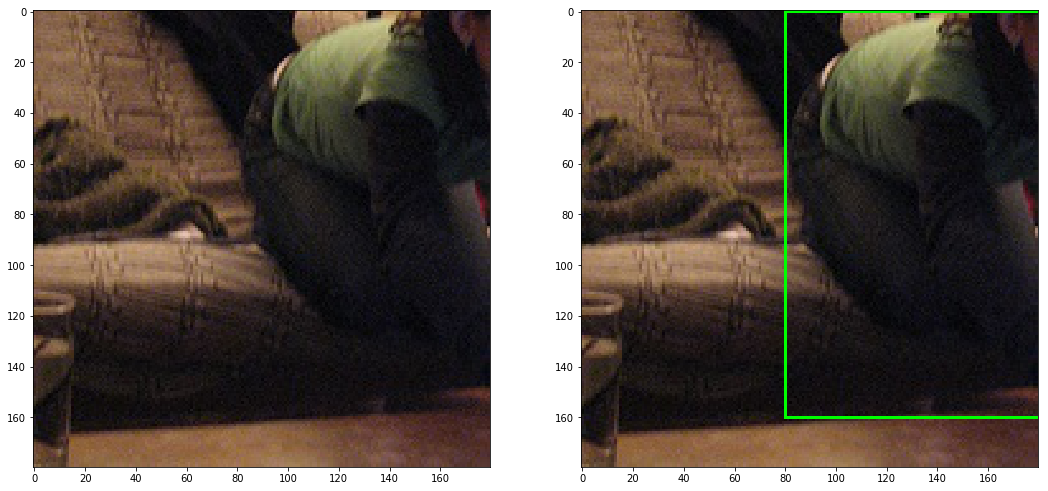

In [73]:
sub_img_name = sub_img_names[randint(0, len(sub_img_names))]

test_sub_img = plt.imread("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/" + sub_img_name + ".jpg")
annotation = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_name + ".txt")

dymmy = test_sub_img.copy()
for obj in annotation:
    rec_img = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

print(test_sub_img.shape)
plt.figure(figsize = (18, 10))
plt.subplot(121), plt.imshow(test_sub_img)
plt.subplot(122), plt.imshow(dymmy)
plt.show()

In [74]:
annotation = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_name + ".txt")
annotation

[['person', '80', '0', '180', '160']]

# Calculate Number of Objects

In [75]:
label_names = ["aeroplane", "bicycle", "bird", "boat", "bottle",
               "bus", "car", "cat", "chair", "cow", "diningtable","dog","horse","motorbike",
              "person","pottedplant","sheep","sofa","train","tvmonitor"]

In [76]:
label_cnts = np.zeros(20)

for sub_anno in sub_txt_src:
    annotation = file_lines_to_list(sub_anno)
    
    for obj in annotation:
        for i in range(len(label_names)):
            if obj[0] == label_names[i]: label_cnts[i] += 1

In [77]:
for i in range(len(label_names)):
    print(label_names[i], int(label_cnts[i]))

aeroplane 104
bicycle 544
bird 51
boat 294
bottle 862
bus 313
car 936
cat 174
chair 1421
cow 121
diningtable 689
dog 569
horse 408
motorbike 541
person 27899
pottedplant 355
sheep 139
sofa 723
train 203
tvmonitor 342


# Stack Sub Images

In [78]:
sub_img_src = glob.glob("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 19512


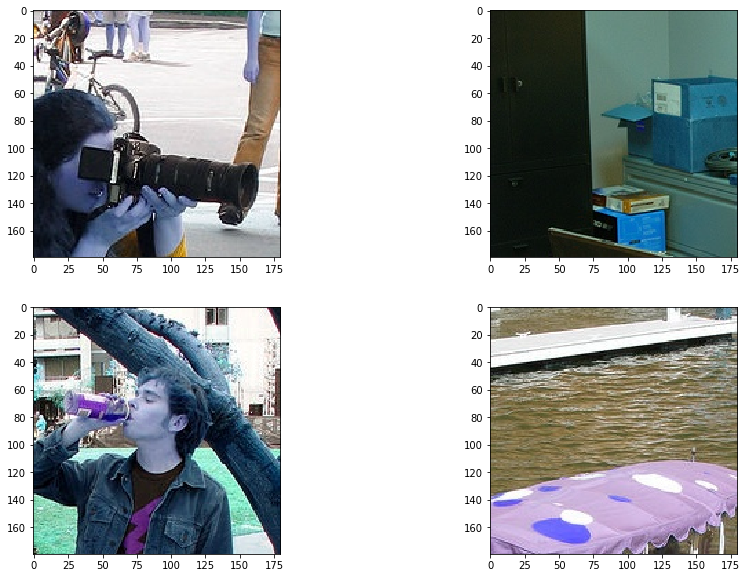

In [79]:
# for i in range(len(sub_img_src)):
for a in range(1):
    i = randint(0, 1000)
    top_left = cv2.imread(sub_img_src[4*i])
    top_right = cv2.imread(sub_img_src[4*i + 1])
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    bot_right = cv2.imread(sub_img_src[4*i + 3])
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(top_left)
plt.subplot(222), plt.imshow(top_right)
plt.subplot(223), plt.imshow(bot_left)
plt.subplot(224), plt.imshow(bot_right)
plt.show()

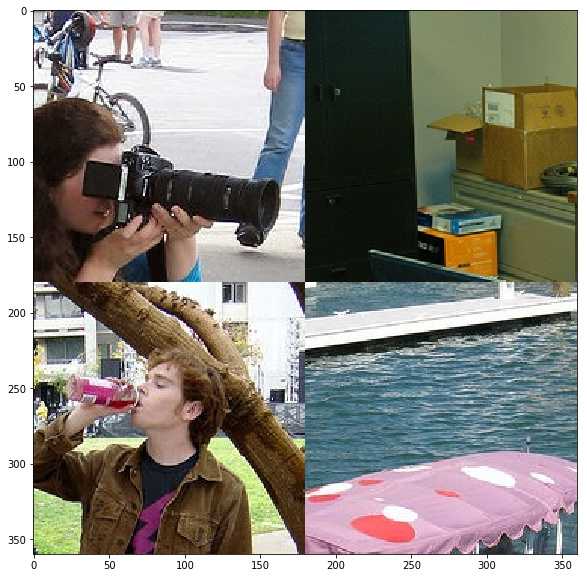

In [80]:

top = np.hstack((top_left, top_right))
bot = np.hstack((bot_left, bot_right))
full = np.vstack((top, bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(full, cv2.COLOR_BGR2RGB))
plt.show()

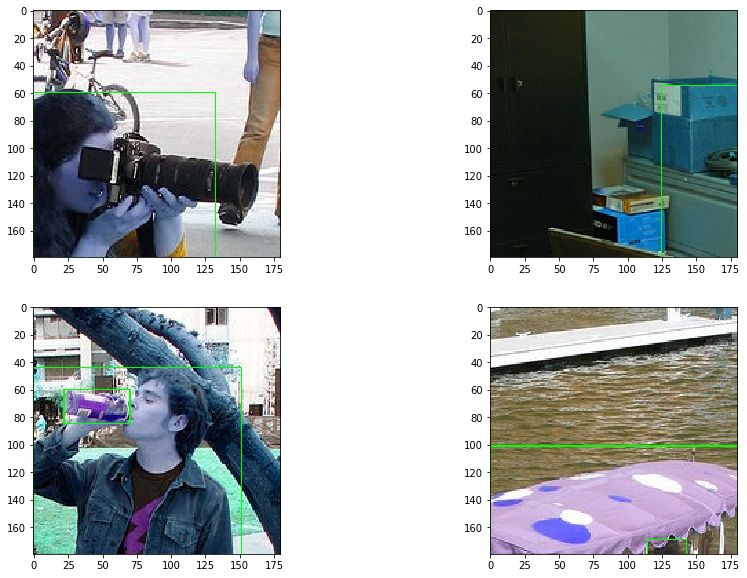

In [81]:
# for i in range(len(sub_img_src)):
for a in range(1):
#     i = randint(0, 1000)
    
    top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i] + ".txt")
    dymmy = top_left.copy()
    for obj in anno:
        rec_tf = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i + 1] + ".txt")
    dymmy = top_right.copy()
    for obj in anno:
        rec_tr = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i + 2] + ".txt")
    dymmy = bot_left.copy()
    for obj in anno:
        rec_bl = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

    bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i + 3] + ".txt")
    dymmy = bot_right.copy()
    for obj in anno:
        rec_br = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(rec_tf)
plt.subplot(222), plt.imshow(rec_tr)
plt.subplot(223), plt.imshow(rec_bl)
plt.subplot(224), plt.imshow(rec_br)
plt.show()

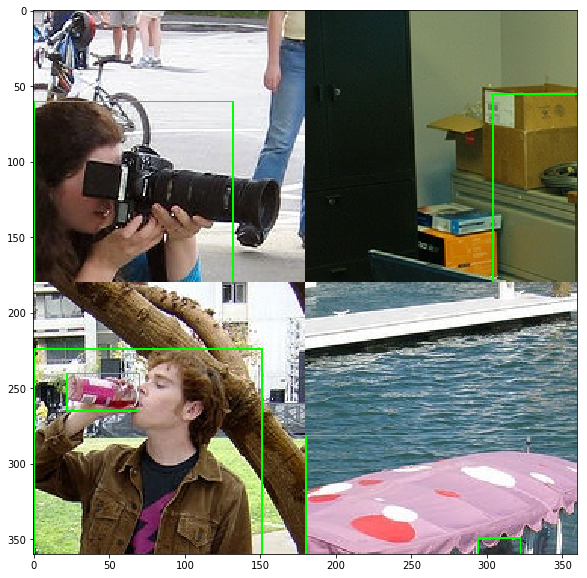

In [82]:
reg_top = np.hstack((rec_tf, rec_tr))
reg_bot = np.hstack((rec_bl, rec_br))
reg_full = np.vstack((reg_top, reg_bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(reg_full, cv2.COLOR_BGR2RGB))
plt.show()

In [85]:
#cv2.imwrite("full_1.jpg", full)
#cv2.imwrite("reg_full_1.jpg", reg_full)

# Write XML Files

In [98]:
#from pascal_voc_writer import Writer

ImportError: No module named 'pascal_voc_writer'

In [87]:
#name = sub_img_names[randint(0, 1000)]
#info = file_lines_to_list("./sub-annotations/" + name + ".txt")
#info

In [233]:
#writer = Writer(name, 360, 360)

#for inf in info:
    #writer.addObject(inf[0], inf[1], inf[2], inf[3], inf[4])
    
#writer.save(name + '.xml')

In [88]:
#print(name)

# Create New Samples and XML Files

In [117]:
from xml.etree import ElementTree
from xml.dom import minidom
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
import os.path as osp

def prettify(elem):
    """Return a pretty-printed XML string for the Element.
        """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="\t")

In [118]:
sub_img_src = glob.glob("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-images/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 19512


In [125]:
w_offset = 180
h_offset = 180

for i in range(len(sub_img_src)//4):
    
    bbox = []
    
    top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i] + ".txt")
    for obj in anno:
        bbox.append(obj)
    
    top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i + 1] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        bbox.append([obj[0], x1, obj[2], x2, obj[4]])
    
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i + 2] + ".txt")
    for obj in anno:
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], obj[1], y1, obj[3], y2])
        
    bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/sub-annotations/" + sub_img_names[4*i + 3] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], x1, y1, x2, y2])
    
    top = np.hstack((top_left, top_right))
    bot = np.hstack((bot_left, bot_right))
    full = np.vstack((top, bot))
        
    bbox = np.array(bbox)  
    annotation = Element('annotation')
    
    for obj in bbox:

        
        SubElement(annotation, 'filename').text = sub_img_names[4*i] + "_stack.jpg"
        SubElement(annotation, 'folder').text = "VOC2012"
        
        
        size_ = SubElement(annotation, 'size')
        SubElement(size_,'width').text = str(360)
        SubElement(size_,'height').text = str(360)
        
        object_ = Element('object')
        SubElement(object_, 'name').text = obj[0]

        bndbox = Element('bndbox')
        SubElement(bndbox, 'xmin').text = obj[1]
        SubElement(bndbox, 'ymin').text = obj[2]
        SubElement(bndbox, 'xmax').text = obj[3]
        SubElement(bndbox, 'ymax').text = obj[4]

        object_.append(bndbox)

        annotation.append(object_)
        
    # Write Image
    #cv2.imwrite("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/full-images/" + sub_img_names[4*i] + "_stack.jpg", full)
    
    # Write XML
    with open(osp.join("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/full-annotations/" + sub_img_names[4*i] + "_stack.xml"), 'w') as f:
        f.write(prettify(annotation))

    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748


# Read Names

In [120]:
xml_src = glob.glob("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/full-annotations/*.xml")
# random.shuffle(sub_img_src)

xml_names = []

for xml in xml_src:

    xml_basename = os.path.basename(xml)
    xml_onlyname = os.path.splitext(xml_basename)

    xml_names.append(xml_onlyname[0])
    
print("Num of sub images:", len(xml_names))

Num of sub images: 4878


In [121]:
text_file = open("/home/jari/guoshi/tool/mosaic/trainval/VOCdevkit/VOC2012/aug-data.txt", "w+")
for infor in xml_names: 
    print(infor, file=text_file)
text_file.close()